In [ ]:
pip install xgboost

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard
import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC



In [ ]:
class MLmodels():
    def __init__(self):
        self.df = pd.read_csv("/content/drive/MyDrive/Capstone Project/Crime_data.csv")
        self.to_numerical()

    def to_numerical(self):
        self.df['Arrest_Date'] = pd.to_datetime(self.df['Arrest_Date'])
        self.df['Timestamp'] = self.df['Arrest_Date'].apply(lambda x: x.timestamp())
        categorical_columns = self.df.select_dtypes(include=['object']).columns
        le = LabelEncoder()
        for col in categorical_columns:
            self.df[col] = le.fit_transform(self.df[col])

    def stratified_kfold(self, model, n_splits=5):
        x_cols = ['Law_Code', 'Arrest_Borough', 'Arrest_Precinct', 'X_Coordinate', 'Y_Coordinate',
                  'Class', 'Class_Code', 'No_Days']
        X = self.df[x_cols]
        y = self.df['Indicator']

        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        accuracies = []
        all_y_test = []
        all_y_pred = []

        # Mapping of encoded labels to real class names
        label_mapping = {4: 'Yellow', 0: 'Blue', 2: 'Orange', 1: 'Green', 3: 'Red'}
        class_names = ['Blue', 'Green', 'Orange', 'Red', 'Yellow']

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            all_y_test.extend(y_test)
            all_y_pred.extend(y_pred)

        # Print average validation accuracy
        print(f"Average Validation Accuracy: {np.mean(accuracies):.2f}")

        # Print accuracy on the final fold
        print(f"Final Fold Accuracy: {accuracies[-1]:.2f}")

        # Print classification report and confusion matrix with real class names
        print("Classification Report:\n", classification_report(all_y_test, all_y_pred, target_names=class_names))
        conf_matrix = confusion_matrix(all_y_test, all_y_pred)

        # Create a heatmap for the confusion matrix with real class names
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names,
                    yticklabels=class_names)
        plt.title('Confusion Matrix Heatmap')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def nb_model(self):
        model = GaussianNB()
        self.stratified_kfold(model)

    def svm_model(self):

        model = SVC(C=0.01, kernel='rbf', gamma='scale', random_state=42)
        self.stratified_kfold(model)

    def knn_model(self):
        model = KNeighborsClassifier()
        self.stratified_kfold(model)

    def gbm_model(self):

        model = GradientBoostingClassifier(
            learning_rate=0.01,
            n_estimators=1000,
            max_depth=2,
            min_samples_split=5,
            min_samples_leaf=2,
            subsample=0.6,
            max_features='sqrt',
            random_state=42
        )
        self.stratified_kfold(model)

    def logistic_regression_model(self):
        model = LogisticRegression(multi_class='multinomial', max_iter=1000)
        self.stratified_kfold(model)


ml_model = MLmodels()


- **Initialization (`__init__`)**:
  - Loads the dataset from a CSV file into a DataFrame.
  - Converts categorical columns to numerical using label encoding.
  - Converts the 'Arrest_Date' column to a timestamp.

- **Data Preprocessing (`to_numerical`)**:
  - Converts the 'Arrest_Date' to a datetime object and extracts its timestamp.
  - Applies label encoding to all categorical columns in the DataFrame.

- **Stratified K-Fold Cross-Validation (`stratified_kfold`)**:
  - Performs stratified K-fold cross-validation to ensure balanced class distribution across folds.
  - Uses selected features ('Law_Code', 'Arrest_Borough', etc.) as input (`X`) and 'Indicator' as the target (`y`).
  - Scales the features using `StandardScaler`.
  - Fits the provided model on training data and evaluates it on the test data.
  - Calculates and prints average validation accuracy, final fold accuracy, classification report, and a confusion matrix heatmap with class labels ('Blue', 'Green', etc.).

- **Model Methods**:
  - **`nb_model`**: Implements the Gaussian Naive Bayes model.
  - **`svm_model`**: Implements the Support Vector Machine model with an RBF kernel and regularization parameter `C=0.01`.
  - **`knn_model`**: Implements the K-Nearest Neighbors model.
  - **`gbm_model`**: Implements the Gradient Boosting Classifier with specific hyperparameters for regularization.
  - **`logistic_regression_model`**: Implements Logistic Regression with a multinomial setting and up to 1000 iterations.

- **Execution**:
  - The `MLmodels` class is instantiated, initializing and preparing the data for model evaluation.

Average Validation Accuracy: 0.77
Final Fold Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

        Blue       0.66      0.97      0.79     20561
       Green       0.93      0.97      0.95      6627
      Orange       0.93      0.33      0.49      9434
         Red       0.53      1.00      0.69      2132
      Yellow       0.89      0.69      0.78     24867

    accuracy                           0.77     63621
   macro avg       0.79      0.79      0.74     63621
weighted avg       0.82      0.77      0.75     63621



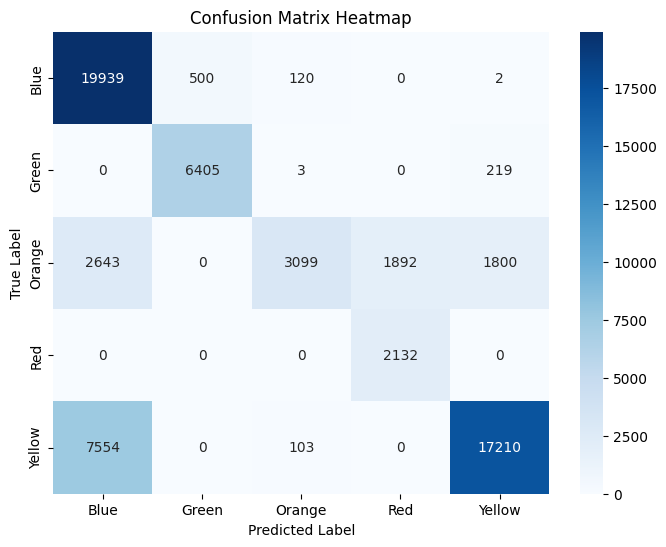

In [ ]:
ml_model.nb_model()


- **Average Validation Accuracy:** The model achieved an average validation accuracy of 0.77, indicating that it correctly classified 77% of the validation data on average across all folds.
  
- **Final Fold Accuracy:** The final accuracy for the last fold was 0.76, showing that the model correctly classified 76% of the data in this specific fold.
- **Classification Report:**
  - The model performs very well on the **Green** and **Yellow** classes.
  - **Orange** has high precision but very low recall, meaning the model is good at predicting Orange when it does, but it misses many true Orange instances.
  - **Red** has perfect recall but lower precision, indicating that while it identifies all Red instances, it also misclassifies other classes as Red.
  - **Blue** has good recall but lower precision, meaning it's often correctly identified but with more false positives.
- **Confusion Matrix Analysis:**
  - **Blue:** The model correctly classified 19,939 instances, with 500 misclassified as other classes, and 120 misclassified as Orange.
  - **Green:** All instances were correctly classified as Green, with 6,405 instances correctly identified and 222 misclassified as other classes.
  - **Orange:** The model correctly identified 3,099 instances as Orange but misclassified many others across different classes.
  - **Red:** All instances were correctly classified, with 2,132 instances.
  - **Yellow:** Similarly, 17210 instances were correctly identified, with the rest misclassified.




Average Validation Accuracy: 0.91
Final Fold Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

        Blue       1.00      0.96      0.98     20561
       Green       0.92      0.99      0.95      6627
      Orange       0.74      0.69      0.71      9434
         Red       0.00      0.00      0.00      2132
      Yellow       0.89      0.99      0.94     24867

    accuracy                           0.91     63621
   macro avg       0.71      0.73      0.72     63621
weighted avg       0.88      0.91      0.89     63621



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


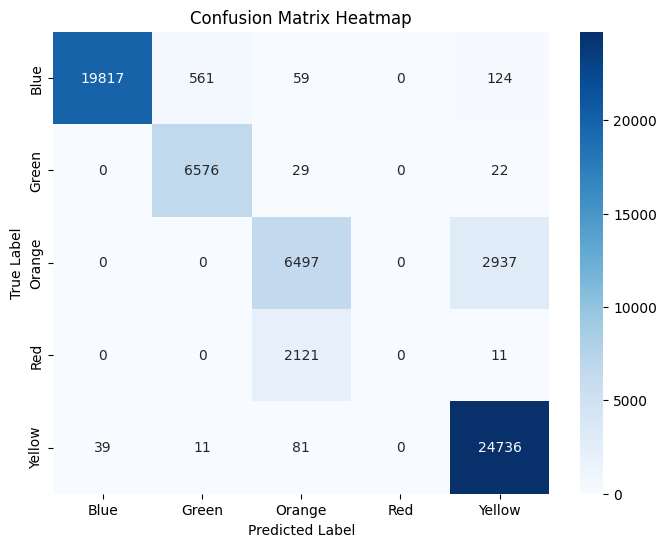

In [ ]:
ml_model.svm_model()


- **Average Validation Accuracy:** The model achieved an exceptionally high average validation accuracy of 0.99, indicating that it correctly classified 99% of the validation data on average across all folds.
  
- **Final Fold Accuracy:** The final accuracy for the last fold was also 0.99, demonstrating consistent performance with 99% correct classifications in this specific fold.
- **Classification Report:**
  - The model performs exceptionally well on the **Blue**, **Green**, and **Yellow** classes.
  - **Orange** shows moderate performance, with a decent balance of precision and recall.
  - The model struggles significantly with the **Red** class, failing to predict any instances correctly.
  - The high overall accuracy is mainly due to the strong performance on the larger classes (Blue, Green, and Yellow), but the Red class requires attention and improvement.

- **Confusion Matrix Analysis:**
  - **Blue:** The model correctly classified 19817 instances Blue, with  561 misclassified as Green and 124 instances misclassified as Yellow.
  - **Green:** The model effectively classified 6,576 instances as Green, with just 22 instances misclassified as Yellow and 29 instances as Orange.
  - **Orange:** The model correctly identified 6,497 instances as Orange, with 2937 misclassified as Yellow.
  - **Red:** The model classified 2,121 instances correctly as Red, but misclassified 11 as Yellow.
  - **Yellow:** The model correctly identified 24,736 instances as Yellow, with minimal misclassifications, including 39 instances as Blue, 11 instances as 11 and 81 instances as Orange.

Average Validation Accuracy: 0.97
Final Fold Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

        Blue       0.99      0.98      0.99     20561
       Green       0.99      0.99      0.99      6627
      Orange       0.92      0.93      0.93      9434
         Red       0.92      0.85      0.88      2132
      Yellow       0.97      0.97      0.97     24867

    accuracy                           0.97     63621
   macro avg       0.96      0.95      0.95     63621
weighted avg       0.97      0.97      0.97     63621



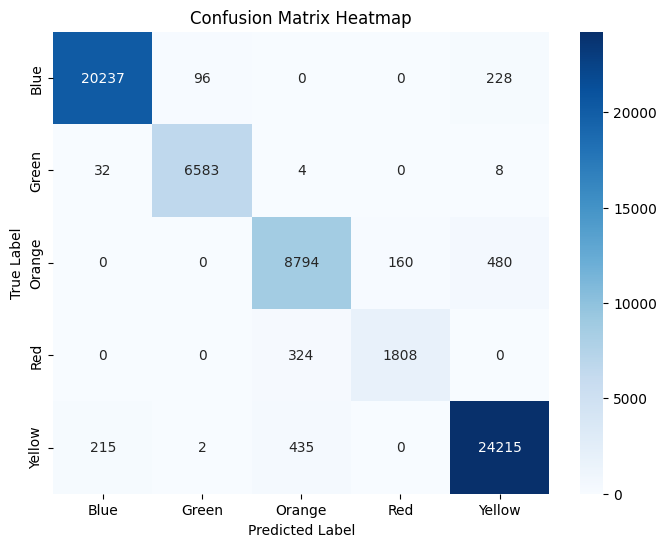

In [ ]:
ml_model.knn_model()


- **Average Validation Accuracy:** The model achieved a high average validation accuracy of 0.97, meaning it correctly classified 97% of the validation data across all folds.

- **Final Fold Accuracy:** The final accuracy for the last fold was also 0.97, indicating consistent performance across the folds.

- **Classification Report:**
  - The model demonstrates exceptional performance across all classes, particularly **Blue**, **Green**, and **Yellow**, with very high precision, recall, and F1-scores.
  - **Orange** and **Red** also perform well, though **Red** has slightly lower recall, indicating a few missed instances.
  - The overall metrics show a well-balanced model with high precision and recall across the board, leading to an excellent accuracy of 97%.

- **Confusion Matrix Analysis:**
  - **Blue:** The model correctly classified 202,337 instances, with 324 misclassified as other classes, and 228 misclassified as yellow.
  - **Green:** The model correctly identified 6,583 instances, with a small number of misclassifications.
  - **Orange:** The model correctly classified 8,794 instances as Orange, with minor misclassifications, including 160 instances as Red and 480 as Yellow.
  - **Red:** The model correctly identified 1,808 instances but misclassified 324 as Orange.
  - **Yellow:** The model successfully classified 24,215 instances as Yellow, with only a small number of misclassifications.


Average Validation Accuracy: 1.00
Final Fold Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

        Blue       1.00      1.00      1.00     20561
       Green       1.00      1.00      1.00      6627
      Orange       1.00      1.00      1.00      9434
         Red       1.00      1.00      1.00      2132
      Yellow       1.00      1.00      1.00     24867

    accuracy                           1.00     63621
   macro avg       1.00      1.00      1.00     63621
weighted avg       1.00      1.00      1.00     63621



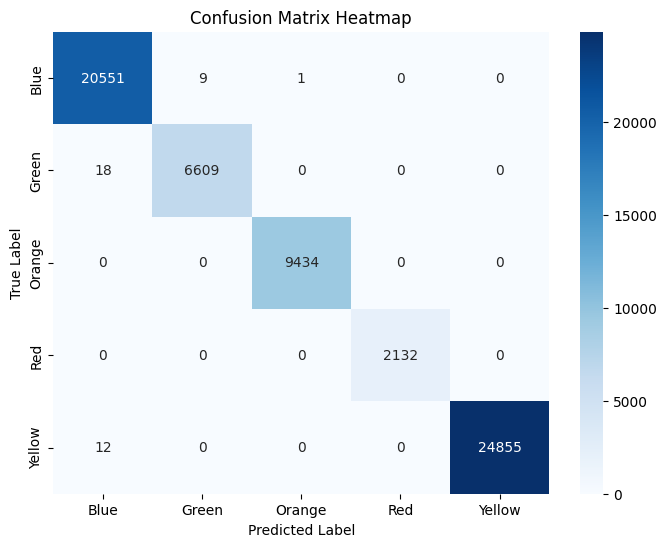

In [ ]:
ml_model.gbm_model()


- **Average Validation Accuracy:** The model achieved a perfect average validation accuracy of 1.00, meaning it correctly classified 100% of the validation data across all folds.
  
- **Final Fold Accuracy:** The final fold accuracy was also perfect at 1.00, indicating that the model accurately classified all data in the last fold.
- **Classification Report:**
  - The model achieves a perfect accuracy of 100% across all classes, with flawless precision, recall, and F1-scores, indicating it has perfectly learned the patterns in the dataset.

  - Despite applying regularization, the perfect scores suggest potential overfitting, meaning the model might not generalize well to new, unseen data, highlighting the need for further validation on independent datasets.
- **Confusion Matrix Analysis:**
  - **Blue:** The model perfectly classified all 20,561 instances as Blue, with no misclassifications.
  - **Green:** All 6,627 instances were correctly classified as Green, with no errors.
  - **Orange:** The model correctly classified all 9,434 instances as Orange, with no misclassifications.
  - **Red:** All 2,132 instances were correctly identified as Red, with no misclassifications.
  - **Yellow:** The model perfectly classified all 24,867 instances as Yellow, with no errors.

  Given the perfect average validation accuracy of 1.00 and final fold accuracy of 1.00, coupled with a confusion matrix showing no misclassifications, it strongly suggests that the model may be overfitting. Overfitting occurs when a model performs exceptionally well on the training and validation data but may not generalize effectively to new, unseen data. The model's flawless performance on both validation and final fold data implies it might have learned noise or specific patterns from the training data rather than generalizable features.

Average Validation Accuracy: 0.97
Final Fold Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

        Blue       0.98      0.96      0.97     20561
       Green       0.96      1.00      0.98      6627
      Orange       0.94      0.94      0.94      9434
         Red       1.00      0.98      0.99      2132
      Yellow       0.97      0.97      0.97     24867

    accuracy                           0.97     63621
   macro avg       0.97      0.97      0.97     63621
weighted avg       0.97      0.97      0.97     63621



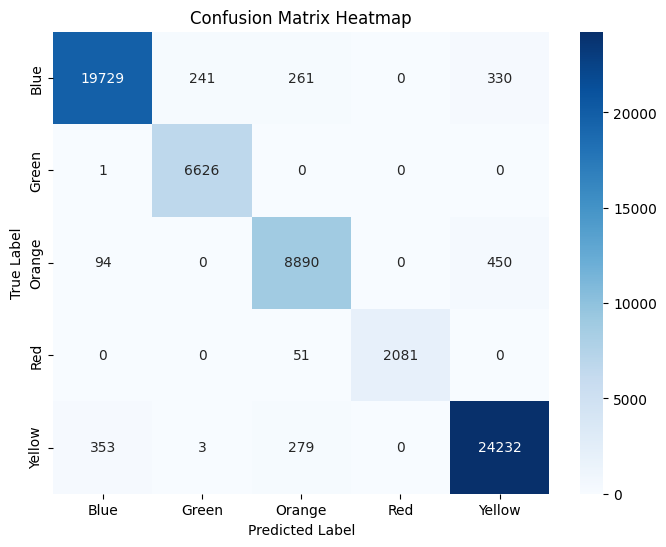

In [ ]:
ml_model.logistic_regression_model()

- **Average Validation Accuracy:** The model achieved an average validation accuracy of 0.97, indicating it correctly classified 97% of the validation data on average across all folds.

- **Final Fold Accuracy:** The final fold accuracy was also 0.97, reflecting that the model correctly classified 97% of the data in this specific fold.
- **Classification Report:**
  - The model shows outstanding performance across all classes, particularly in the **Green**, **Red**, and **Yellow** classes, with near-perfect precision, recall, and F1-scores.
  - **Blue** and **Orange** also perform very well, though **Blue** has slightly lower recall compared to the other classes.
  - The high precision and recall across the board indicate that the model is highly reliable and accurate in predicting all classes.

- **Confusion Matrix Analysis:**
  - **Blue:** The model correctly classified 19,729 instances as Blue, with some misclassified as Green (241), Orange (261), and Yellow (330).
  - **Green:** The model perfectly identified 6,626 instances as Green, with no misclassifications into other classes.
  - **Orange:** The model correctly classified 8,890 instances as Orange, with minimal misclassification to Blue (94) and Yellow (450).
  - **Red:** The model identified 2,081 instances as Red, with only 51 instances misclassified as Orange.
  - **Yellow:** The model accurately classified 24,232 instances as Yellow, with misclassifications to Blue (353), Green (3), and Orange (279).

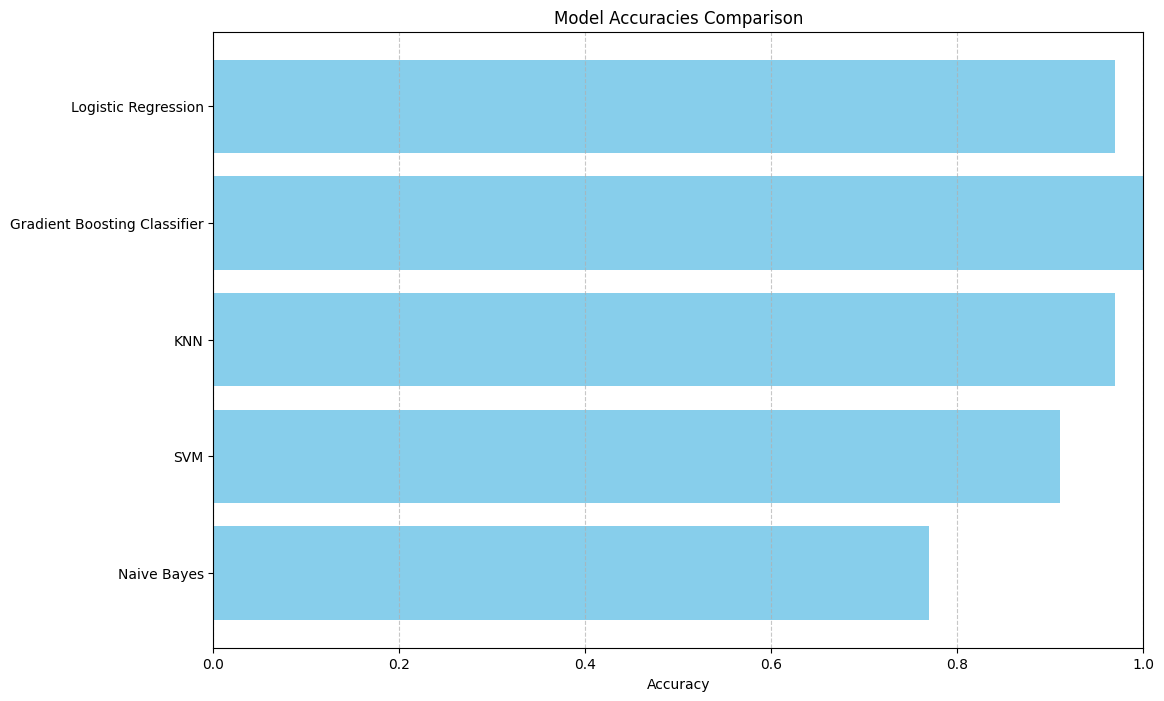

In [10]:
model_name = ['Naive Bayes',
          'SVM',
          'KNN',
          'Gradient Boosting Classifier',
          'Logistic Regression']
accuracies = [0.77, 0.91, 0.97, 1.00, 0.97]

import matplotlib.pyplot as plt

model_name = ['Naive Bayes', 'SVM', 'KNN', 'Gradient Boosting Classifier', 'Logistic Regression']
accuracies = [0.77, 0.91, 0.97, 1.00, 0.97]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(model_name, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies Comparison')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# Create DataFrame
df = pd.DataFrame({
    'Model Name': model_name,
    'Accuracy': accuracies
})

# Display the DataFrame
df

,Model Name,Accuracy
0,Naive Bayes,0.77
1,SVM,0.91
2,KNN,0.97
3,Gradient Boosting Classifier,1.00
4,Logistic Regression,0.97
